In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
confirmed_df = pd.read_csv(r'.\CONVENIENT_global_confirmed_cases.csv')
column_list = []
for i in confirmed_df.columns:
    if 'China' in i:
        column_list.append(i)

confirmed_df_china = confirmed_df[column_list]
confirmed_df_china.dropna(inplace=True)
province = confirmed_df_china.iloc[0, :]
province = province.values.tolist()

confirmed_df_china = confirmed_df_china[1:].astype('float')
confirmed_df_china.columns = province
confirmed_df_china.index = range(312)

sum_list = []
for i in province:
    total = 0
    l = confirmed_df_china[[i]].values
    for j in l:
        total += int(sum(j))
    sum_list.append(total)

label = ['Hubei', 'Hong Kong', 'Guangdong', 'Shanghai', 'Zhejiang', 'Others']

# Selecting the five provinces with the largest number of confirmed cases
hubei = sum_list[province.index('Hubei')]
hongkong = sum_list[province.index('Hong Kong')]
guangdong = sum_list[province.index('Guangdong')]
shanghai = sum_list[province.index('Shanghai')]
zhejiang = sum_list[province.index('Zhejiang')]
others = 0
for i in province:
    if i not in label:
        others += sum_list[province.index(i)]

data = [hubei, hongkong, guangdong, shanghai, zhejiang, others]

# Calculating the percentage of each province
percentage = [format(i/sum(data)*100, '.2f') for i in data]

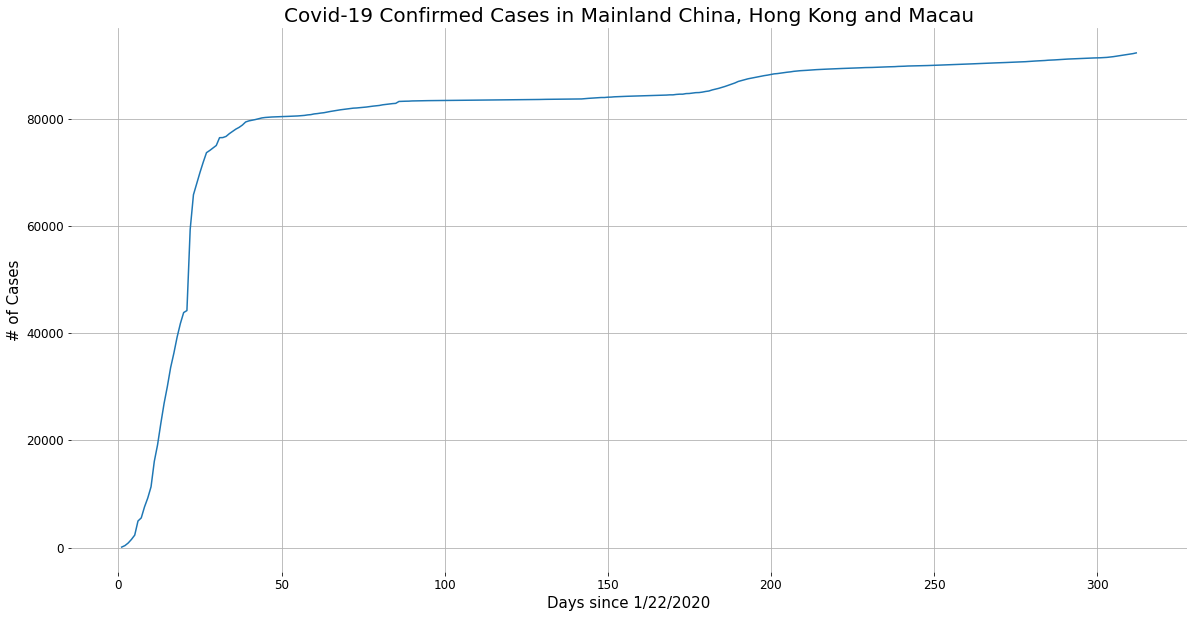

In [3]:
# Replicating line chart
confired_num = np.array(confirmed_df_china)[0].sum()
daily_confirmed = [np.array(confirmed_df_china)[0].sum()]
for i in range(1, 312):
    confired_num += np.array(confirmed_df_china)[i].sum()
    daily_confirmed.append(confired_num)

plt.figure(figsize=(20, 10))
plt.plot(range(1, 313), daily_confirmed)
plt.grid(True)
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title('Covid-19 Confirmed Cases in Mainland China, Hong Kong and Macau', size=20)
plt.tick_params(labelsize=12)
plt.xlabel('Days since 1/22/2020', size=15)
plt.ylabel("# of Cases", size=15)
plt.show()

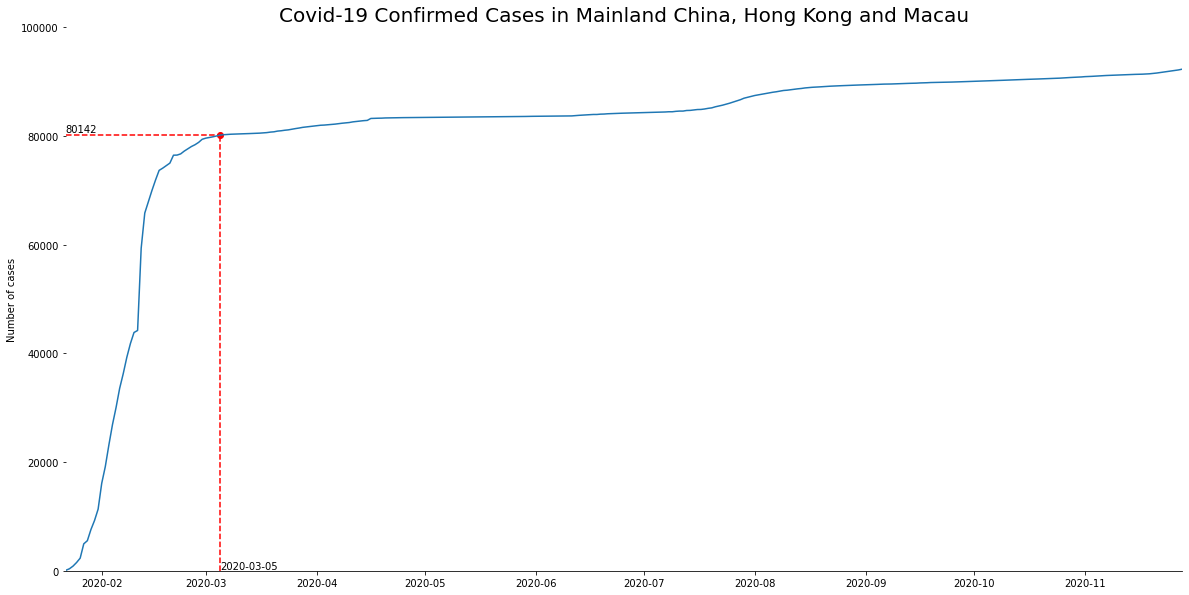

In [4]:
# Making some improvements
daily_confirmed_df = pd.DataFrame(daily_confirmed, index=pd.date_range('2020-01-22', periods=312, freq='D'))

# Finding out the day of March 5
n = 0
for i in daily_confirmed:
    if int(i) > 80000:
        break
    n += 1

plt.figure(figsize=(20, 10))
# Emphasazing March 3
plt.text(daily_confirmed_df.index[0], daily_confirmed[n]+500, str(int(daily_confirmed[n])))
plt.text(daily_confirmed_df.index[n], 0, str(daily_confirmed_df.index[n])[:10], verticalalignment='bottom')
plt.scatter(daily_confirmed_df.index[n], daily_confirmed[n], color='red')
plt.plot([daily_confirmed_df.index[n], daily_confirmed_df.index[n]], [0, daily_confirmed[n]], linestyle='dashed', color='red')
plt.plot([daily_confirmed_df.index[0], daily_confirmed_df.index[n]], [daily_confirmed[n], daily_confirmed[n]], linestyle='dashed', color='red')
plt.plot(daily_confirmed_df)
plt.xlim((daily_confirmed_df.index[0], daily_confirmed_df.index[-1]))
plt.ylim((0, 100000))
plt.ylabel('Number of cases')
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title('Covid-19 Confirmed Cases in Mainland China, Hong Kong and Macau', size=20)
plt.show()

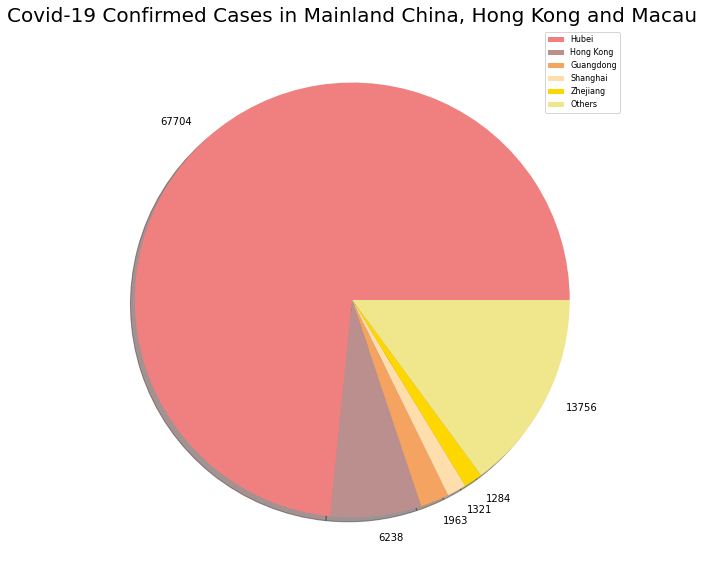

In [5]:
# Replicating the pie chart
c = ['lightcoral', 'rosybrown', 'sandybrown', 'navajowhite', 'gold',
    'khaki', 'lightskyblue', 'turquoise', 'lightslategrey', 'thistle', 'pink']
plt.figure(figsize=(20, 10))
plt.title('Covid-19 Confirmed Cases in Mainland China, Hong Kong and Macau', size=20)
plt.pie(data, colors=c, shadow=True, labels=data)
plt.legend(label, loc='best', fontsize=8)
plt.show()

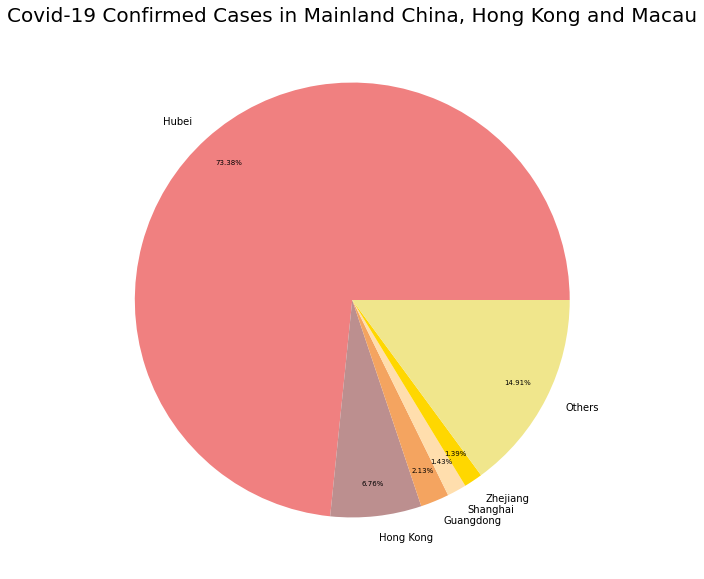

In [6]:
plt.figure(figsize=(20, 10))
plt.title('Covid-19 Confirmed Cases in Mainland China, Hong Kong and Macau', size=20)
# Adjusting the size of labels
patches, l_text, p_text = plt.pie(data, colors=c, shadow=False, labels=label, autopct="%1.2f%%", pctdistance=0.85)
for t in p_text:
    t.set_size(7)

for t in l_text:
    t.set_size(10)
plt.show()

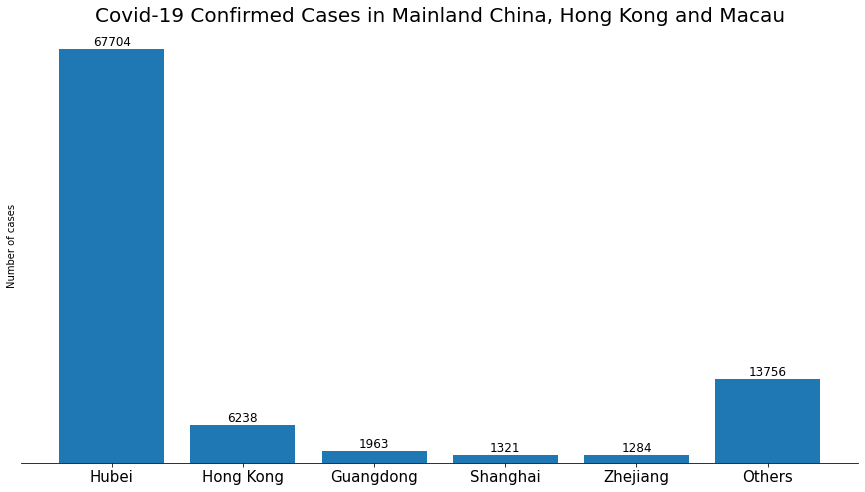

In [7]:
# Bar chart
plt.figure(figsize=(15, 8))
plt.bar(label, data)
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.tick_params(labelsize=15)
for a, b in zip(range(1, len(label)+1), data):
    plt.text(a - 1, b + 1, str(data[a-1]), ha='center', va='bottom', fontsize=12)
plt.title('Covid-19 Confirmed Cases in Mainland China, Hong Kong and Macau', size=20)
plt.ylabel('Number of cases')
plt.show()

## The following is an interactive interface using html

In [8]:
import plotly as py
import plotly.graph_objs as go
import numpy as np
import pandas as pd

In [9]:
confirmed_df = pd.read_csv(r'.\CONVENIENT_global_confirmed_cases.csv')
column_list = []
for i in confirmed_df.columns:
    if 'China' in i:
        column_list.append(i)

confirmed_df_china = confirmed_df[column_list]
confirmed_df_china.dropna(inplace=True)
province = confirmed_df_china.iloc[0, :]
province = province.values.tolist()

confirmed_df_china = confirmed_df_china[1:].astype('float')
confirmed_df_china.columns = province
confirmed_df_china.index = range(312)

sum_list = []
for i in province:
    total = 0
    l = confirmed_df_china[[i]].values
    for j in l:
        total += int(sum(j))
    sum_list.append(total)

label = ['Hubei', 'Hong Kong', 'Guangdong', 'Shanghai', 'Zhejiang', 'Others']

# Selecting the five provinces with the largest number of confirmed cases
hubei = sum_list[province.index('Hubei')]
hongkong = sum_list[province.index('Hong Kong')]
guangdong = sum_list[province.index('Guangdong')]
shanghai = sum_list[province.index('Shanghai')]
zhejiang = sum_list[province.index('Zhejiang')]
others = 0
for i in province:
    if i not in label:
        others += sum_list[province.index(i)]

data = [hubei, hongkong, guangdong, shanghai, zhejiang, others]

# Calculating the percentage of each province
percentage = [format(i/sum(data)*100, '.2f') for i in data]

In [10]:
confired_num = np.array(confirmed_df_china)[0].sum()
daily_confirmed = [np.array(confirmed_df_china)[0].sum()]
for i in range(1, 312):
    confired_num += np.array(confirmed_df_china)[i].sum()
    daily_confirmed.append(confired_num)
daily_confirmed_df = pd.DataFrame(daily_confirmed, index=pd.date_range('2020-01-22', periods=312, freq='D'))

# Finding out the day of March 5
n = 0
for i in daily_confirmed:
    if int(i) > 80000:
        break
    n += 1

In [13]:
# Making an interactive line chart
trace1 = go.Scatter(
    x=daily_confirmed_df.index,
    y=daily_confirmed,
    mode='lines',
    line=dict(
        width=4,
        color='red'
    ),
    name='Confirmed Cases'
)

# Marking March 5
trace2 = go.Scatter(
    x=[daily_confirmed_df.index[n]],
    y=[daily_confirmed[n]],
    mode='markers',
    name='March 5'
)

layout = go.Layout(
    plot_bgcolor='white',
    title=dict(
        text='Covid-19 Confirmed Cases in Mainland China, Hong Kong and Macau',
        x=0.5,
        xanchor='center',
        xref='paper'
    ),
    xaxis={
        'showline': True,
        'showgrid': False,
        'zeroline': True,
        'ticks': 'outside',
    },
    yaxis={
        'showline': True,
        'showgrid': False,
        'zeroline': True,
        'ticks': 'outside',
        'tickformat': ","
    },
    showlegend=False,
    annotations=[
        dict(x=daily_confirmed_df.index[n], y=daily_confirmed[n], xref='x', yref='y',
             text='(March 5, 2020, {})'.format(str(int(daily_confirmed[n]))), showarrow=True)
    ]
)

data = [trace1, trace2]
# Combining the graph part and the layout part into a figure object
fig = go.Figure(data=data, layout=layout)
fig.update_layout(xaxis_title="Datetime",
                  yaxis_title="Number of confirmed cases", )

#py.offline.plot(fig, filename='Covid-19_visualization.html')
#fig.show()